In [1]:
# import docarray
# from docarray import Document, DocumentArray, dataclass
# from docarray.typing import Image, Text
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm

@dataclass
class Patient:
    patientID: Text
    image: Image
    seg_images: Image
    bnpp: Text
    cardio_edema: Text
    bmi: Text
    creatinine: Text
    pneumonia: Text
    acuteHF: Text

In [2]:
data = pd.read_csv('data/256_images_np/data.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.AcuteHF = data.AcuteHF.astype(int)
data.PNA = data.PNA.astype(int)
data.cardio_edema = data.cardio_edema.astype(int)
data.to_csv('data/256_images_np/data_fixed.csv', index=False)
data

unique_key     bnpp  cardio_edema    bmi     cr  PNA  \
0       Abachug_50267230_img1    418.0             1  25.51   0.61    1   
1        Abadik_50217497_img1   2161.0             1  31.38   1.31    0   
2      Abafouck_52403307_img1    118.0             0  33.81   0.66    0   
3       Abagash_52691625_img1     49.9             0  30.64   0.64    0   
4      Abakleem_50725934_img1  20029.0             1  34.81  10.54    0   
...                       ...      ...           ...    ...    ...  ...   
16614  Zufosloo_50189474_img1   2988.0             1  44.06   1.29    0   
16615  Zuliquep_52986445_img1   5684.0             1  26.07   0.50    0   
16616   Zunakot_51932665_img1    123.0             0  22.73   0.94    0   
16617  Zuplouke_51797661_img1   1290.0             1  27.66   1.77    0   
16618    Zuridi_50548513_img1   1542.0             1  32.81   1.11    0   

       AcuteHF  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
16614        1  
16615        1  
16616        0  
16617        0  
16618        1  

[16619 rows x 7 columns]

(16619, 256, 256, 6)


NameError: name 'torch' is not defined

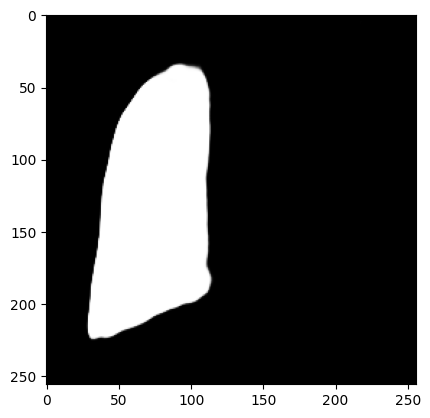

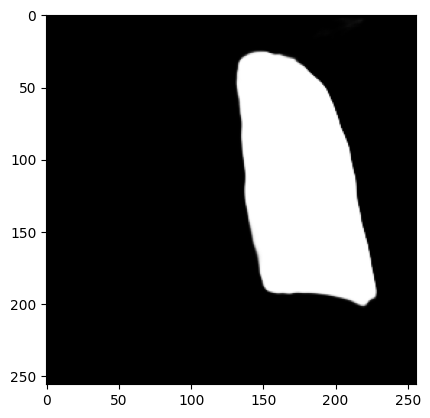

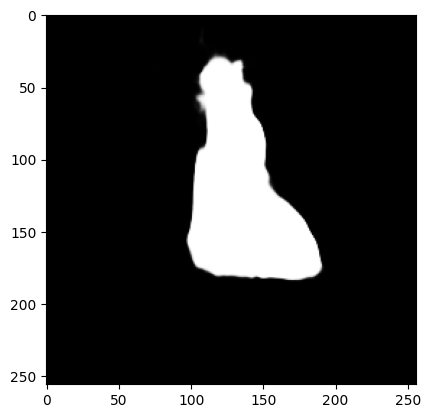

<Figure size 640x480 with 0 Axes>

In [3]:
with h5py.File('seg_images_fixed.hdf5','r') as hf:
    print(hf['training_images'].shape)
    plt.figure()
    plt.imshow(hf['training_images'][0,:,:,0],cmap='gray')
    plt.figure()
    plt.imshow(hf['training_images'][0,:,:,1],cmap='gray')
    plt.figure()
    plt.imshow(hf['training_images'][0,:,:,2],cmap='gray')
    plt.figure()
    mask1 = torch.from_numpy(hf['training_images'][0,:,:,0])
    #print(mask1)
    fixed_mask1 = np.where(mask1 >= 0.5, 1, 0)
    #print(np.sum(fixed_mask))
    #print(len(np.where(mask1[0]>=0.5)),len(np.where(mask1[1]>=0.5)))
    mask2 = torch.from_numpy(hf['training_images'][0,:,:,1])
    fixed_mask2 = np.where(mask2 >= 0.5, 1, 0)
    #print(mask2)
    mask3 = torch.from_numpy(hf['training_images'][0,:,:,2])
    fixed_mask3 = np.where(mask3 >= 0.5, 1, 0)
    #print(mask3)
    mask = torch.from_numpy(fixed_mask1).logical_or(torch.from_numpy(fixed_mask2)).logical_or(torch.from_numpy(fixed_mask3))
    print(mask)
    plt.imshow(mask,cmap='gray')
    hf.close()

(16619, 256, 256, 6)


100%|██████████| 16619/16619 [02:37<00:00, 105.34it/s]


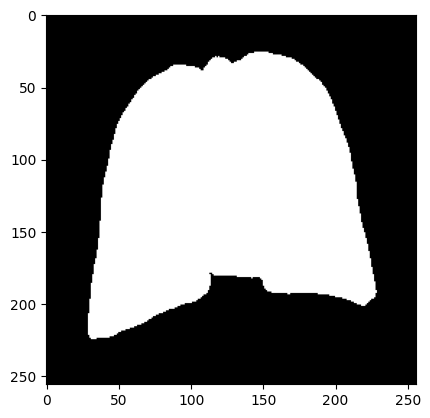

In [4]:
masks = []
with h5py.File('seg_images_fixed.hdf5','r') as hf:
    print(hf['training_images'].shape)
    for i in tqdm(range(hf['training_images'].shape[0])):
    
        mask1 = hf['training_images'][i,:,:,0]
        fixed_mask1 = np.where(mask1 >= 0.5, 1, 0)
        mask2 = hf['training_images'][i,:,:,1]
        fixed_mask2 = np.where(mask2 >= 0.5, 1, 0)
        mask3 = hf['training_images'][i,:,:,2]
        fixed_mask3 = np.where(mask3 >= 0.5, 1, 0)
        mask = np.logical_or(fixed_mask1,fixed_mask2)
        mask = np.logical_or(mask,fixed_mask3)
        mask = mask.reshape(256,256,1)
        #print(mask.shape)
        #plt.imshow(mask,cmap='gray')
        masks.append(mask)
    hf.close()
masks = np.array(masks)
plt.imshow(masks[0],cmap='gray')

In [11]:
f = h5py.File('mask_images_fixed.hdf5','w')
f.create_dataset('training_images', data=masks)
f.close()

(16619, 256, 256, 1)


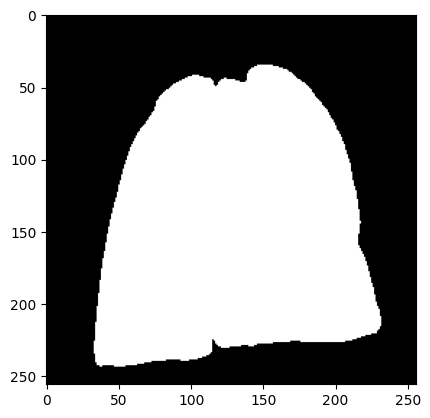

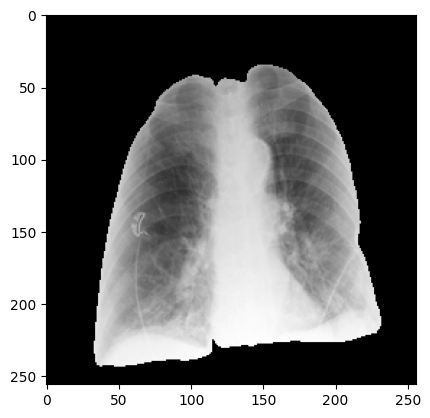

In [6]:
plt.imshow(masks[1000],cmap='gray')
with h5py.File('images_fixed.hdf5','r') as hf2:
    print(hf2['training_images'].shape)
    plt.figure()
    hf2['training_images'][1000]*masks[1000]
    hf2.close()

(16619, 256, 256, 1)


100%|██████████| 16619/16619 [02:58<00:00, 92.93it/s] 


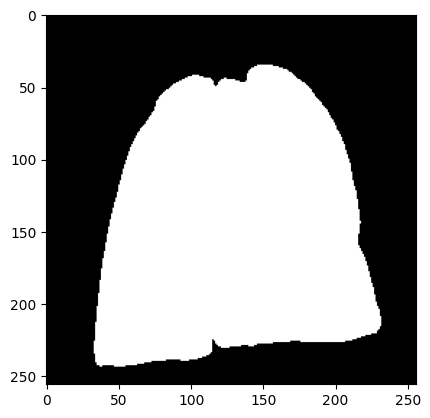

In [13]:
plt.imshow(masks[1000],cmap='gray')
images = []
with h5py.File('images_fixed.hdf5','r') as hf2:
    print(hf2['training_images'].shape)
    for i in tqdm(range(hf2['training_images'].shape[0])):
        images.append(hf2['training_images'][i]*masks[i])
    hf2.close()
images = np.array(images)

In [19]:
f = h5py.File('D:/Downloads/final_seg_images.hdf5','w')
f.create_dataset('training_images', data=images)
f.close()

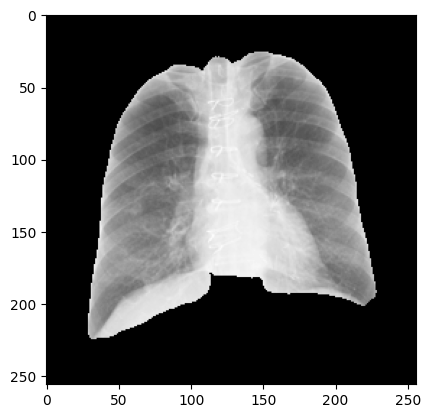

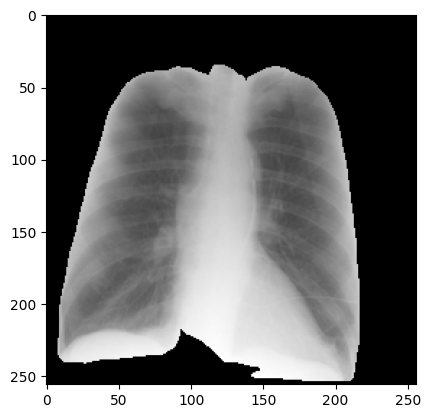

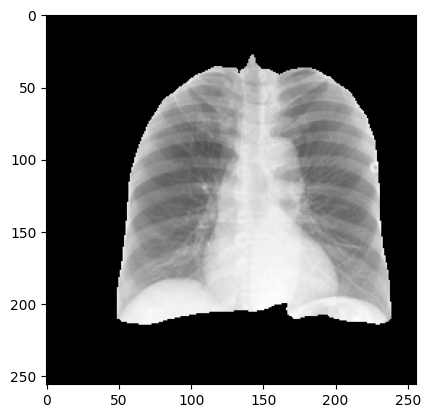

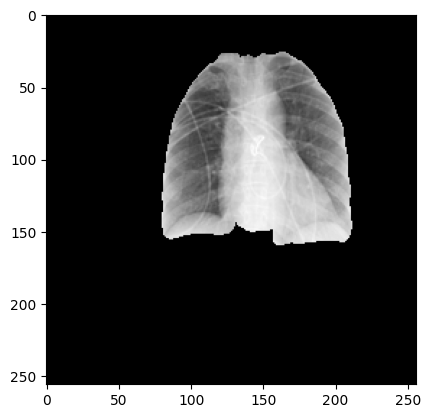

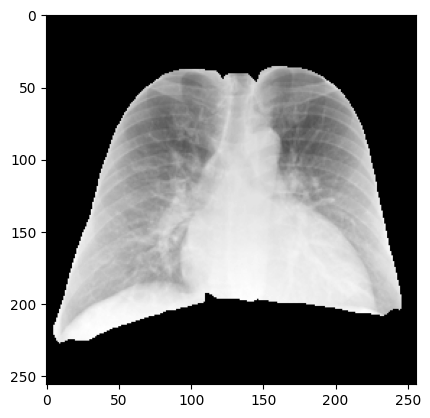

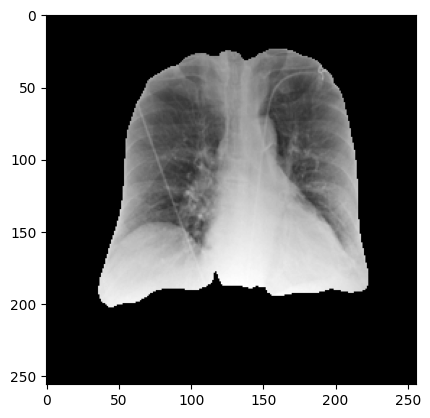

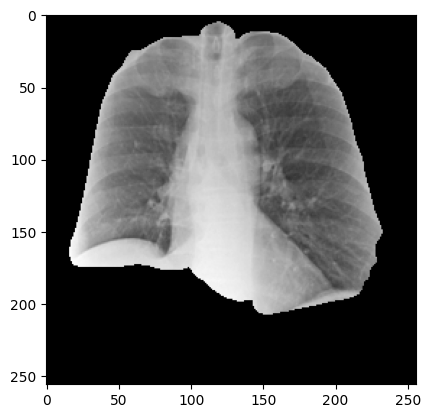

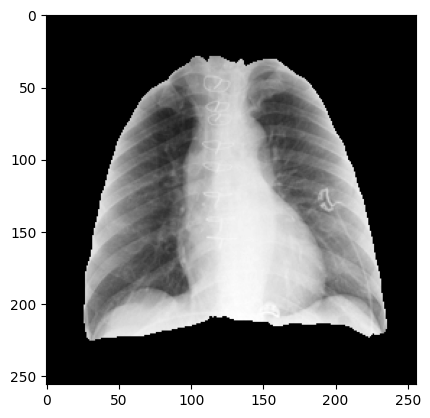

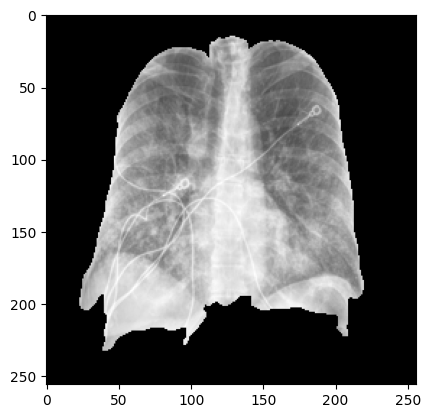

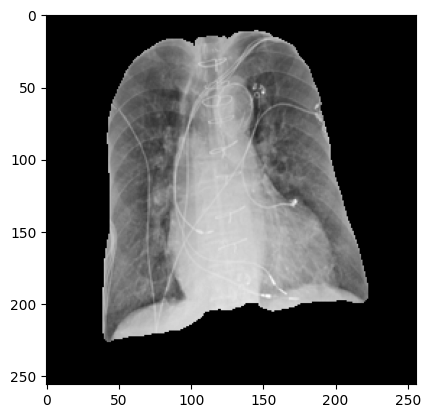

In [22]:
f = h5py.File('D:/Downloads/final_seg_images.hdf5','r')
for i in range(10):
    plt.figure()
    plt.imshow(f['training_images'][i],cmap='gray')
#plt.imshow(f['training_images'][10000],cmap='gray')
f.close()